In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, FeatureAgglomeration
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, StandardScaler
from tqdm import tqdm_notebook as tqdm
# Loading in the cleaned DF
with open("ProfileData_pickleFiles/refined_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [3]:
df.head(5)

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Programming,Traveller,Age
0,Evil beer aficionado. Freelance introvert. Tv ...,"[Adventure, RomCom, Action]",Buddhist,"[Country, Pop, Romantic]",Progressive,"[LinkedIn, Facebook]","[Baseball, Chess, Basketball]","[C++, Java, C#]","[Short journeys, Long Trips, Adventure]",33
1,Passionate gamer. Evil internet aficionado. St...,"[Musical, Drama, Comedy]",Muslim,"[Jazz, Romantic, Rock]",Moderate,"[Youtube, Facebook, Pinterest]","[Cricket, Baseball, BadmintonFootball]","[C++, Swift]","[Short journeys, Long Trips, Adventure]",22
2,Social media guru. Tv expert. Amateur beer eva...,"[Adventure, RomCom, Action]",Christian,"[Romantic, EDM, HipHop]",Liberal,"[Youtube, Facebook]","[Cricket, BadmintonFootball, Chess]","[C++, Swift, Go]","[Short journeys, Long Trips, Adventure]",19
3,Reader. Incurable analyst. Proud pop culture e...,"[Adventure, Action, Thriller]",Other,"[Country, Romantic]",Liberal,"[Youtube, Facebook]","[Baseball, Cricket]","[Java, JavaScript]","[Long Trips, Adventure, Treking]",24
4,Typical gamer. Friend of animals everywhere. A...,"[Adventure, Drama, Action]",Christian,"[Jazz, Romantic, HipHop]",Liberal,"[Youtube, Facebook, SnapChat]","[Cricket, Hockey, Basketball]","[C++, Java, Swift]","[Adventure, Treking]",24


### Vectorizing 

In [4]:
# Converting lists data to strings to apply vectorization
def to_string(x):

    if isinstance(x, list):
        return ' '.join(x)
    else:
        return x
    
# Looping through the columns and applying the function
for col in df.columns:
    df[col] = df[col].apply(to_string)

In [5]:
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Programming,Traveller,Age
0,Evil beer aficionado. Freelance introvert. Tv ...,Adventure RomCom Action,Buddhist,Country Pop Romantic,Progressive,LinkedIn Facebook,Baseball Chess Basketball,C++ Java C#,Short journeys Long Trips Adventure,33
1,Passionate gamer. Evil internet aficionado. St...,Musical Drama Comedy,Muslim,Jazz Romantic Rock,Moderate,Youtube Facebook Pinterest,Cricket Baseball BadmintonFootball,C++ Swift,Short journeys Long Trips Adventure,22
2,Social media guru. Tv expert. Amateur beer eva...,Adventure RomCom Action,Christian,Romantic EDM HipHop,Liberal,Youtube Facebook,Cricket BadmintonFootball Chess,C++ Swift Go,Short journeys Long Trips Adventure,19
3,Reader. Incurable analyst. Proud pop culture e...,Adventure Action Thriller,Other,Country Romantic,Liberal,Youtube Facebook,Baseball Cricket,Java JavaScript,Long Trips Adventure Treking,24
4,Typical gamer. Friend of animals everywhere. A...,Adventure Drama Action,Christian,Jazz Romantic HipHop,Liberal,Youtube Facebook SnapChat,Cricket Hockey Basketball,C++ Java Swift,Adventure Treking,24
...,...,...,...,...,...,...,...,...,...,...
745,Social media fanatic. Typical coffee buff. Fre...,Drama Adventure Comedy,Other,Classical Romantic HipHop,Conservative,Facebook,Baseball Cricket Chess,Python Java Go,Adventure Treking,23
746,Student. Reader. Bacon trailblazer. Explorer. ...,Drama RomCom Adventure,Spiritual,Country Pop HipHop,Conservative,Reddit Facebook,Cricket Baseball Chess,JavaScript Java Go,Short journeys Long Trips Treking,42
747,Reader. Tv lover. Beer nerd. Incurable interne...,Horror Action Thriller,Hindu,Jazz Country Romantic,Centrist,Youtube Instagram,Cricket Baseball Hockey,Java JavaScript,Short journeys Long Trips Adventure,26
748,Amateur travel expert. Organizer. Alcohol fana...,Action Adventure,Christian,Pop Romantic HipHop,Moderate,Youtube Reddit Facebook,Baseball Other BadmintonFootball,C++ Go,Short journeys Long Trips Treking,30


In [6]:
def vectorization(df, columns):

    column_name = columns[0]
    
    # Checking if the column name has been removed already
    if column_name not in ['Bios', 'Movies','Religion', 'Music', 'Politics', 'Social Media', 'Sports','Programming', 'Traveller']:
        return df
    
    if column_name in ['Religion', 'Politics']:
        df[column_name.lower()] = df[column_name].cat.codes
        
        df = df.drop(column_name, axis=1)
        
        return vectorization(df, df.columns)
    
    else:
        # Instantiating the Vectorizer
#         vectorizer = TfidfVectorizer()
        vectorizer = CountVectorizer()
        
        # Fitting the vectorizer to the Bios
        x = vectorizer.fit_transform(df[column_name])

        # Creating a new DF that contains the vectorized words
        df_vectorized_words = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

        # Concating the words DF with the original DF
        new_df = pd.concat([df, df_vectorized_words], axis=1)

        # Dropping the column because it is no longer needed in place of vectorization
        new_df = new_df.drop(column_name, axis=1)
        
        return vectorization(new_df, new_df.columns) 

In [7]:
# Creating the vectorized DF
vectorized_df = vectorization(df, df.columns)

In [8]:
vectorized_df

,Age,advocate,aficionado,alcohol,amateur,analyst,animals,apathy,avid,award,...,java,javascript,python,swift,adventure,journeys,long,short,treking,trips
0,33,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,0,1
1,22,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,1
2,19,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,1
3,24,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,1
4,24,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,23,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
746,42,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,1,1
747,26,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,0,1
748,30,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,1


### Scaling

In [9]:
scaler = QuantileTransformer()
# scaler = RobustScaler()
# scaler = MinMaxScaler()

vectorized_df = pd.DataFrame(scaler.fit_transform(vectorized_df), index=vectorized_df.index, columns=vectorized_df.columns)

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (750). n_quantiles is set to n_samples.
  warnings.warn(


In [10]:
vectorized_df

,Age,advocate,aficionado,alcohol,amateur,analyst,animals,apathy,avid,award,...,java,javascript,python,swift,adventure,journeys,long,short,treking,trips
0,0.952603,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.443258,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.161549,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.611482,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.611482,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.528037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
746,0.996662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
747,0.736983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
748,0.891188,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


### PCA

In [11]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(vectorized_df)

# Finding the exact number of features that explain at least 90% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_9 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_9 = vectorized_df.shape[1] - n_over_9

print("PCA reduces the # of features from", vectorized_df.shape[1], 'to', n_to_reach_9)

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_9)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(vectorized_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

PCA reduces the # of features from 149 to 73


0.9479431250037041

In [12]:
import scipy.cluster.hierarchy as shc

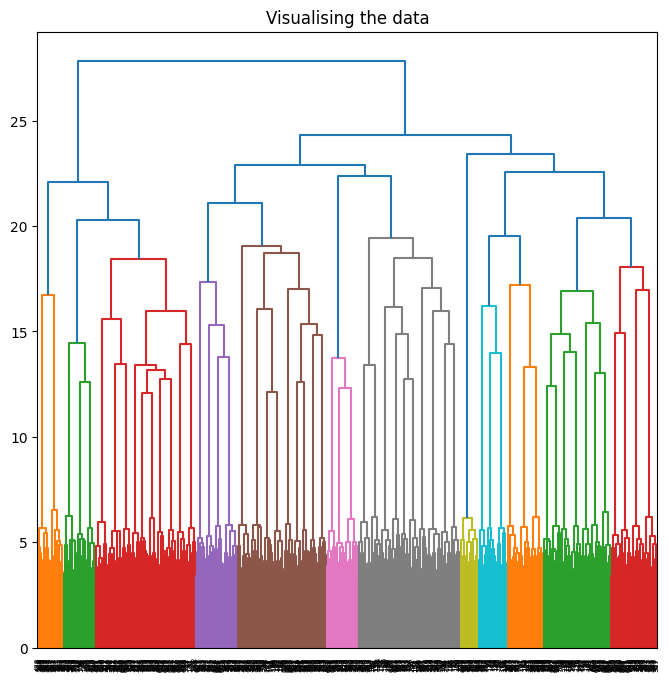

In [13]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(vectorized_df, method ='ward')))

## DBScan Clustering


In [14]:
## Finding optimal eps value for dbscan 
from sklearn.neighbors import NearestNeighbors

In [15]:
nearest_neighbors = NearestNeighbors(n_neighbors=12)
neighbors = nearest_neighbors.fit(df_pca)
distances, indices = neighbors.kneighbors(df_pca)
distances = np.sort(distances[:,10], axis = 0)

In [16]:
!pip install kneed

4.74216886819739


<Figure size 500x500 with 0 Axes>

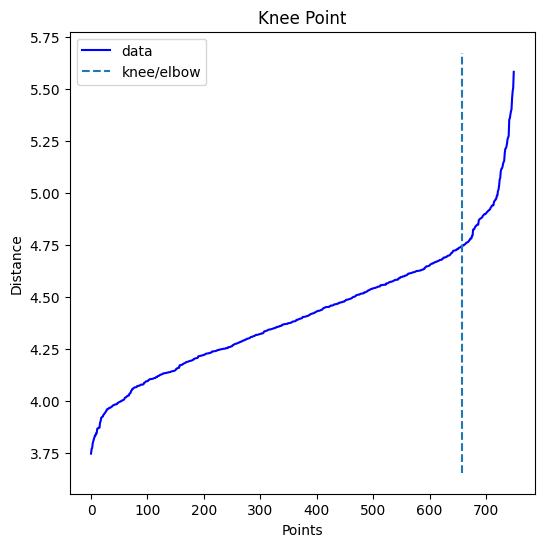

In [17]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [9]


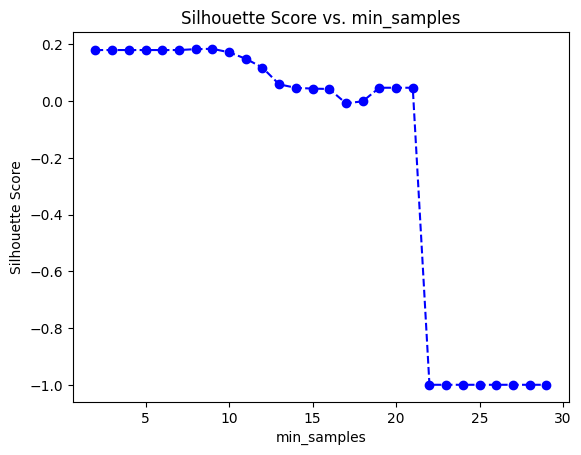

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 

def get_dbscan_score(data, min_samples):
    '''
    
    INPUT:
        data - the dataset you want to fit DBSCAN to
        min_samples - the minimum number of samples in a neighborhood for a point to be considered as a core point
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    # instantiate DBSCAN
    dbscan = DBSCAN(eps=4.427064678292151, min_samples=min_samples)

    # fit the model to your data
    model = dbscan.fit(data)
    
    # check if there is more than one unique label
    unique_labels = len(set(model.labels_))
    if unique_labels > 1:
        # calculate Silhouette Score
        score = silhouette_score(data, model.labels_, metric='euclidean')
        return score
    else:
        # return a very low score if there is only one unique label
        return -1.0

# Create an empty list to store silhouette scores
scores = []

# Define a range of min_samples values
min_samples_values = list(range(2, 30))

# Calculate silhouette scores for each min_samples value
for min_samples in min_samples_values:
    scores.append(get_dbscan_score(df_pca, min_samples))

# Plot the Silhouette Score vs. min_samples
plt.plot(min_samples_values, scores, linestyle='--', marker='o', color='b')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. min_samples')

# Create a DataFrame to find the optimal min_samples
df_scores = pd.DataFrame({'min_samples': min_samples_values, 'scores': scores})
optimal_min_samples = df_scores[df_scores['scores'] == df_scores['scores'].max()]['min_samples'].tolist()
print('Optimal number of min_samples based on silhouette score:', optimal_min_samples)


Optimal number of min_samples based on Calinski Harabasz score: [19, 20, 21]


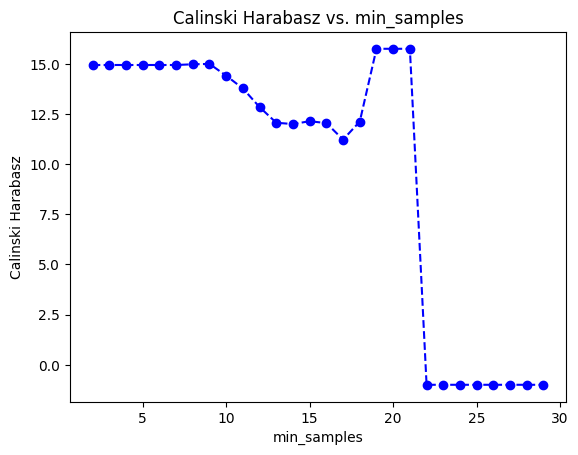

In [19]:
from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, min_samples):
    '''
    INPUT:
        data - the dataset you want to fit DBSCAN to
        min_samples - the minimum number of samples in a neighborhood for a point to be considered as a core point
    OUTPUT:
        score - the Calinski Harabasz score for the DBSCAN model fit to the data
    '''
    # Instantiate DBSCAN
    dbscan = DBSCAN(eps=4.427064678292151, min_samples=min_samples)

    # Fit the model to your data
    model = dbscan.fit(data)
    
    # Check if there is more than one unique label
    unique_labels = len(set(model.labels_))
    
    if unique_labels > 1:
        # Calculate Calinski Harabasz Score
        score = calinski_harabasz_score(data, model.labels_)
        return score
    else:
        # Return a very low score if there is only one unique label
        return -1.0

# Create an empty list to store Calinski Harabasz scores
scores = []
min_samples_values = list(range(2, 30))

# Loop through different min_samples values and calculate Calinski Harabasz scores
for min_samples in min_samples_values:
    scores.append(get_dbscan_score(df_pca, min_samples))

# Plot the results
plt.plot(min_samples_values, scores, linestyle='--', marker='o', color='b')
plt.xlabel('min_samples')
plt.ylabel('Calinski Harabasz')
plt.title('Calinski Harabasz vs. min_samples')

# Find the optimal number of min_samples based on the highest Calinski Harabasz score
df3 = pd.DataFrame(min_samples_values, columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on Calinski Harabasz score:', df4['min_samples'].tolist())


Optimal number of min_samples based on DB score: [19, 20, 21]


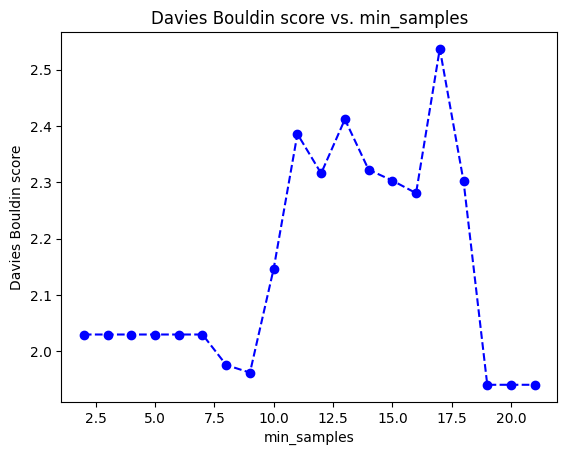

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    # instantiate dbscan
    dbscan = DBSCAN(eps=4.427064678292151, min_samples=center)

    # fit the model to your data using the fit_predict method
    model = dbscan.fit_predict(data)
    
    # Check if only one label is assigned
    unique_labels = set(model)
    if len(unique_labels) == 1:
        return float('inf')  # Return a large value for infinite score

    # Calculate Davies Bouldin Score
    score = davies_bouldin_score(data, model)
    
    return score

# Create an example DataFrame df_pca
# Replace this with your actual data
# df_pca = ...

# Modify the range to start from 2, as DBSCAN needs at least 2 samples
centers = list(range(2, 30))
scores = []

for center in centers:
    scores.append(get_dbscan_score(df_pca, center))

# Plot the results
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('min_samples')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. min_samples')

# Find the optimal number of min_samples based on DB score
df3 = pd.DataFrame(centers, columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())


### DB clustering

In [21]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=4.427064678292151, min_samples= 12)

# rule of thumb for min_samples: 2*len(cluster_df.columns)

# fit model and predict clusters
yhat = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_dbsacn_s = silhouette_score(df_pca, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(df_pca, yhat)

score_dbsacn_d = davies_bouldin_score(df_pca, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.1180
Calinski Harabasz Score: 12.8464
Davies Bouldin Score: 2.3158


## Using Agglomerative Hierarchial Clustering

In [22]:
!pip install yellowbrick

In [23]:
pip install -c conda-forge scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


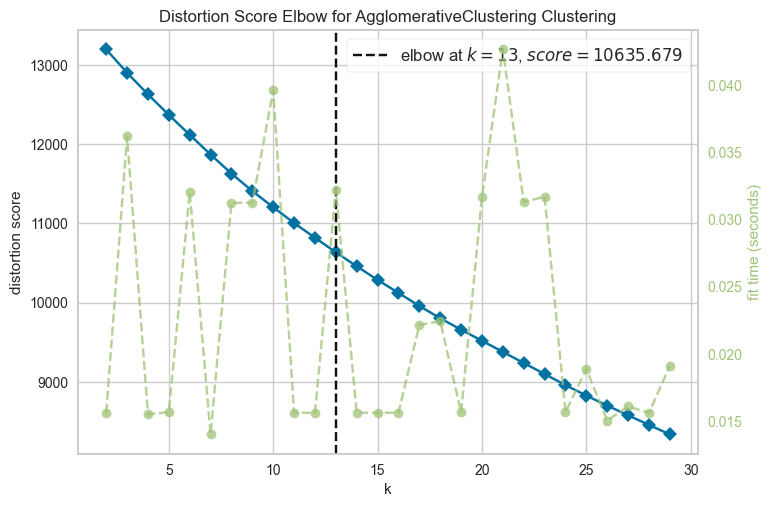

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# define dataset

model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

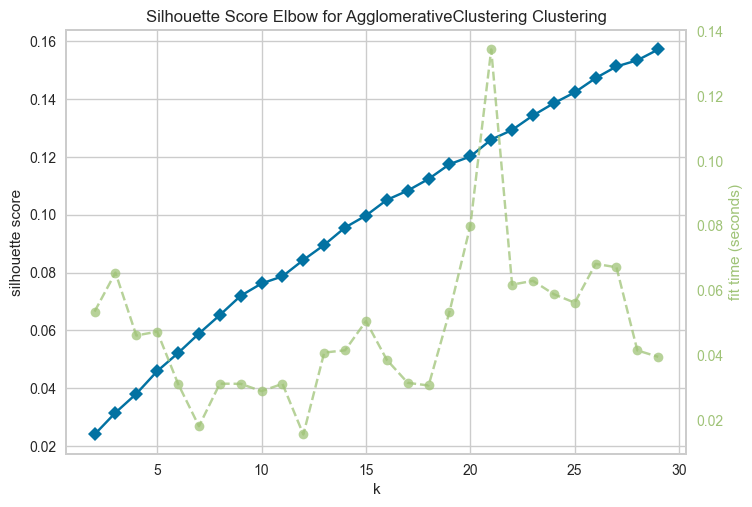

Optimal number of clusters based on silhouette score: [29]


In [25]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

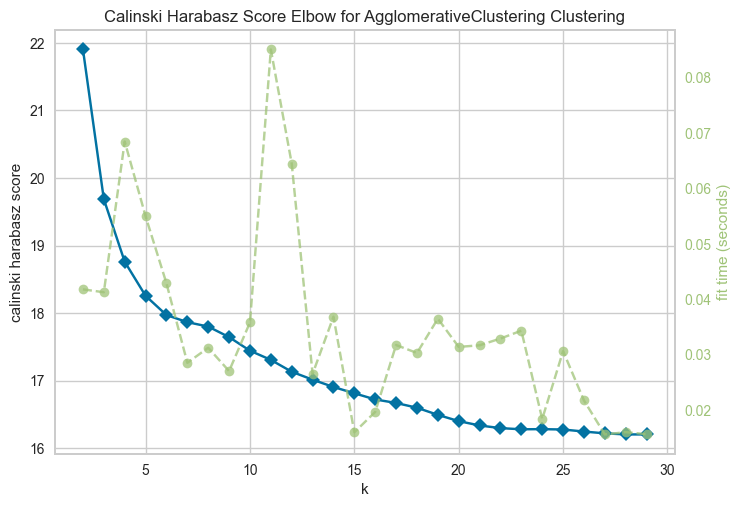

Optimal number of clusters based on calinski score: [2]


In [26]:
# Calinski Harabasz Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski score:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [29]


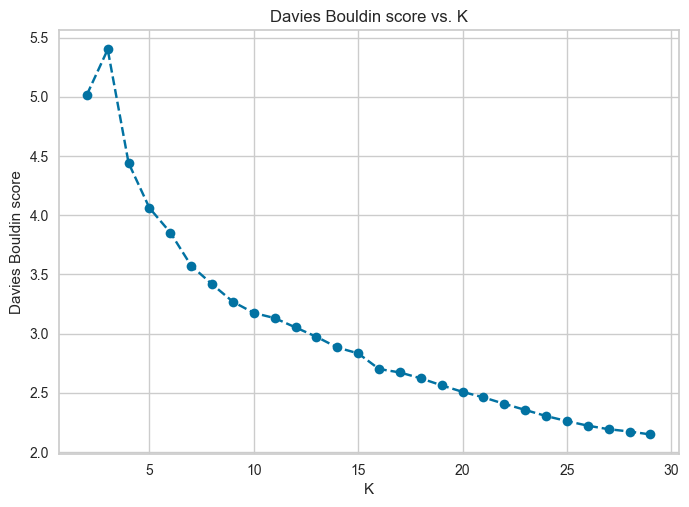

In [27]:
# Davies Bouldin score for Hierarchical Clustering
from sklearn.metrics import davies_bouldin_score 

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center, linkage='ward')

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(df_pca)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(df_pca, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(df_pca, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

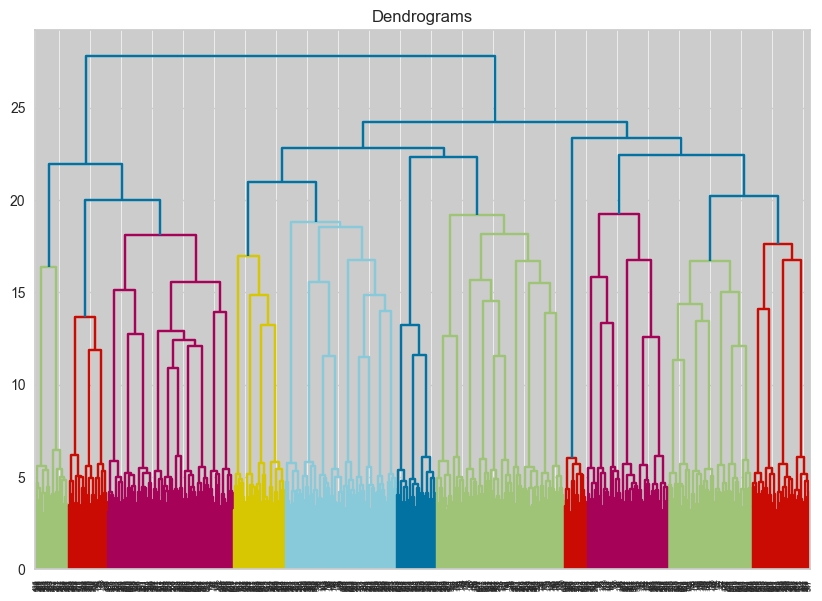

In [28]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))

In [29]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(df_pca)
yhat_2 = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(df_pca, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(df_pca, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(df_pca, yhat_2)



print('Silhouette Score: %.4f' % score_AGclustering_s)

print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.0315
Calinski Harabasz Score: 19.6857
Davies Bouldin Score: 5.3998


In [30]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 30, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []
s_scores = []
db_scores = []

# The DF for evaluation
eval_df = df_pca

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Clustering with different numbers of clusters
    clust = AgglomerativeClustering(n_clusters=i, linkage='ward')
    clust.fit(eval_df)
    cluster_assignments = clust.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(eval_df, cluster_assignments))
    s_scores.append(silhouette_score(eval_df, cluster_assignments))
    db_scores.append(davies_bouldin_score(eval_df, cluster_assignments))


In [31]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    

In [32]:
print("The Calinski-Harabasz Score (find max score):")
cluster_eval(ch_scores, cluster_cnt)

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

The Calinski-Harabasz Score (find max score):
Max Value:
Cluster #    Cluster Score
2      21.902682

Min Value:
Cluster #     Cluster Score
29       16.20264

The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #     Cluster Score
29       0.157205

Min Value:
Cluster #    Cluster Score
2        0.02395

The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
3       5.399783

Min Value:
Cluster #     Cluster Score
29       2.148445


### Agglo using linkage='single'

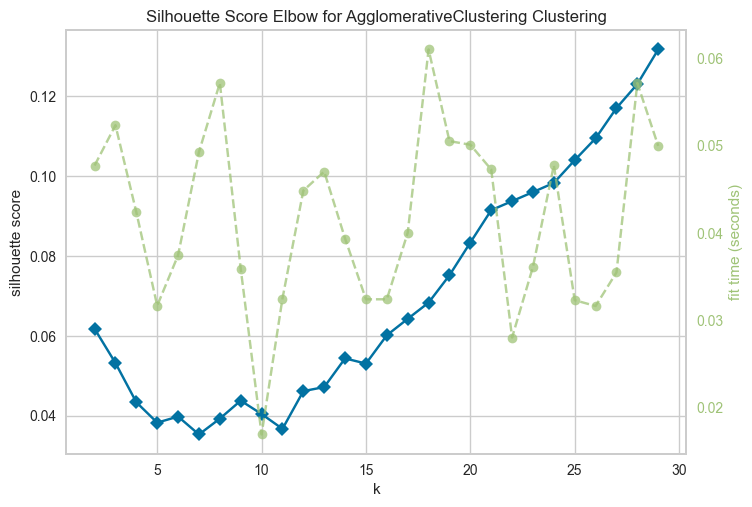

Optimal number of clusters based on silhouette score: [29]


In [33]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='single')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

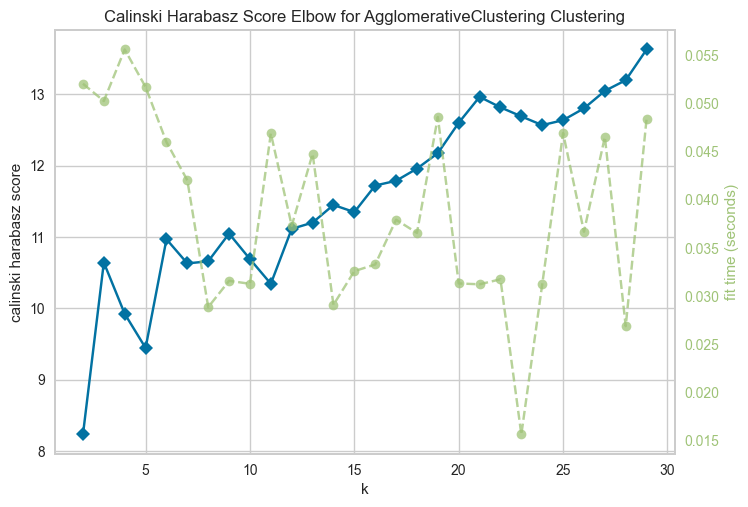

Optimal number of clusters based on calinski score: [29]


In [34]:
# Calinski Harabasz Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='single')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski score:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [2]


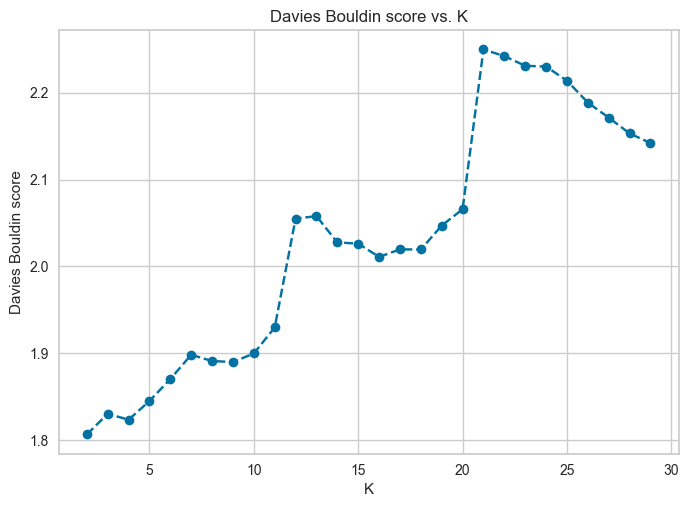

In [35]:
# Davies Bouldin score for Hierarchical Clustering

from sklearn.metrics import davies_bouldin_score 

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center, linkage='single')

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(df_pca)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(df_pca, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(df_pca, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

## Fitting Data with optimal Value

In [36]:
algo = AgglomerativeClustering(n_clusters=3, linkage='complete')
algo.fit(df_pca)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [37]:
cluster_labels = algo.labels_

In [38]:
df['Cluster Label'] = cluster_labels
vectorized_df['Cluster Labels'] = cluster_labels

In [39]:
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Programming,Traveller,Age,Cluster Label
0,Evil beer aficionado. Freelance introvert. Tv ...,Adventure RomCom Action,Buddhist,Country Pop Romantic,Progressive,LinkedIn Facebook,Baseball Chess Basketball,C++ Java C#,Short journeys Long Trips Adventure,33,1
1,Passionate gamer. Evil internet aficionado. St...,Musical Drama Comedy,Muslim,Jazz Romantic Rock,Moderate,Youtube Facebook Pinterest,Cricket Baseball BadmintonFootball,C++ Swift,Short journeys Long Trips Adventure,22,1
2,Social media guru. Tv expert. Amateur beer eva...,Adventure RomCom Action,Christian,Romantic EDM HipHop,Liberal,Youtube Facebook,Cricket BadmintonFootball Chess,C++ Swift Go,Short journeys Long Trips Adventure,19,0
3,Reader. Incurable analyst. Proud pop culture e...,Adventure Action Thriller,Other,Country Romantic,Liberal,Youtube Facebook,Baseball Cricket,Java JavaScript,Long Trips Adventure Treking,24,0
4,Typical gamer. Friend of animals everywhere. A...,Adventure Drama Action,Christian,Jazz Romantic HipHop,Liberal,Youtube Facebook SnapChat,Cricket Hockey Basketball,C++ Java Swift,Adventure Treking,24,0
...,...,...,...,...,...,...,...,...,...,...,...
745,Social media fanatic. Typical coffee buff. Fre...,Drama Adventure Comedy,Other,Classical Romantic HipHop,Conservative,Facebook,Baseball Cricket Chess,Python Java Go,Adventure Treking,23,0
746,Student. Reader. Bacon trailblazer. Explorer. ...,Drama RomCom Adventure,Spiritual,Country Pop HipHop,Conservative,Reddit Facebook,Cricket Baseball Chess,JavaScript Java Go,Short journeys Long Trips Treking,42,0
747,Reader. Tv lover. Beer nerd. Incurable interne...,Horror Action Thriller,Hindu,Jazz Country Romantic,Centrist,Youtube Instagram,Cricket Baseball Hockey,Java JavaScript,Short journeys Long Trips Adventure,26,1
748,Amateur travel expert. Organizer. Alcohol fana...,Action Adventure,Christian,Pop Romantic HipHop,Moderate,Youtube Reddit Facebook,Baseball Other BadmintonFootball,C++ Go,Short journeys Long Trips Treking,30,0


In [40]:
with open("refined_cluster_pickle_file.pkl",'wb') as fp:
    pickle.dump(df, fp)
    
with open("vectorized_refined_pickle_file.pkl", 'wb') as fp:
    pickle.dump(vectorized_df, fp)

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [42]:
# Assigning the split variables
X = vectorized_df.drop(["Cluster Labels"], axis =1)
y = vectorized_df['Cluster Labels']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
# Dummy
dummy = DummyClassifier(strategy='stratified')

# KNN
knn = KNeighborsClassifier()

# SVM
svm = SVC(gamma='scale')

# NaiveBayes
nb = ComplementNB()

# Logistic Regression
lr = LogisticRegression()

# Adaboost
adab = AdaBoostClassifier()

# List of models
models = [dummy, knn, svm, nb, lr, adab]

# List of model names
names = ['Dummy', 'KNN', 'SVM', 'NaiveBayes', 'Logistic Regression', 'Adaboost']

# Zipping the lists
classifiers = dict(zip(names, models))

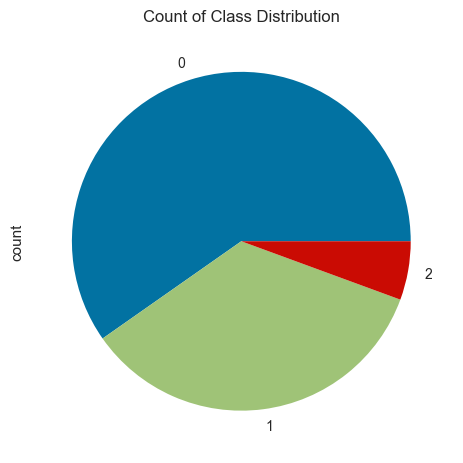

In [44]:
# Visualization of the different cluster counts
vectorized_df['Cluster Labels'].value_counts().plot(kind='pie', title='Count of Class Distribution');

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

# Create a StandardScaler to scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary containing the model names and their scores
models_f1 = {}

# Loop through each model's predictions and get their classification reports
for name, model in tqdm(classifiers.items()):
    try:
        if name == "NaiveBayes":
            # Create and fit the Multinomial Naive Bayes model
            nb_model = MultinomialNB()
            nb_model.fit(X_train_scaled, y_train)
            
            # Make predictions and calculate the F1 score
            y_pred_nb = nb_model.predict(X_test_scaled)
            f1_nb = f1_score(y_test, y_pred_nb, average='macro')
            
            # Assign the F1 score to the dictionary
            models_f1[name] = f1_nb
            print(f"{name} (Macro Avg - F1 Score):", f1_nb)
        elif name == "Logistic Regression":
            # Create and fit the Logistic Regression model with increased max_iter
            lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter as needed
            lr_model.fit(X_train_scaled, y_train)
            
            # Make predictions and calculate the F1 score
            y_pred_lr = lr_model.predict(X_test_scaled)
            f1_lr = f1_score(y_test, y_pred_lr, average='macro')
            
            # Assign the F1 score to the dictionary
            models_f1[name] = f1_lr
            print(f"{name} (Macro Avg - F1 Score):", f1_lr)
        else:
            # Fit the model on the scaled data
            model.fit(X_train_scaled, y_train)
            
            # Make predictions and calculate the F1 score
            y_pred = model.predict(X_test_scaled)
            f1 = f1_score(y_test, y_pred, average='macro')
            
            # Assign the F1 score to the dictionary
            models_f1[name] = f1
            print(f"{name} (Macro Avg - F1 Score):", f1)
    except Exception as e:
        print(f"Error for model {name}: {str(e)}")


  0%|          | 0/6 [00:00<?, ?it/s]

Dummy (Macro Avg - F1 Score): 0.3187063875469673
KNN (Macro Avg - F1 Score): 1.0


 50%|█████     | 3/6 [00:00<00:00, 12.02it/s]

SVM (Macro Avg - F1 Score): 1.0
Error for model NaiveBayes: Negative values in data passed to MultinomialNB (input X)
Logistic Regression (Macro Avg - F1 Score): 1.0


100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

Adaboost (Macro Avg - F1 Score): 0.8303880803880803


In [46]:
pip install cython numpy


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade pip setuptools

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 1.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.1 MB 2.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 3.2 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 3.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 3.7 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.9/2.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 3.9 MB/s eta 0:00:01
   -----------------------

In [48]:
pip install hdbscan==0.8.31

Note: you may need to restart the kernel to use updated packages.


In [49]:
import hdbscan

In [50]:
def hdbscan_algo(df, method, list_name):
    import warnings
    warnings.filterwarnings('ignore')  
    global data_leaf, data_eom
    n = df.shape[0]
    for gamma in range(1, int(np.log(n))):
        for ms in range(1, int(2 * np.log(n))):
            min_cluster_size = int(round(gamma * np.sqrt(n)))
            print("gamma:", gamma)
            print("np.sqrt(n):", np.sqrt(n))
            print("min_cluster_size:", min_cluster_size)
        
            clust_alg = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                                    approx_min_span_tree=True,
                                    gen_min_span_tree=True, 
                                    leaf_size=40,
                                    cluster_selection_method=method,
                                    metric='euclidean', 
                                    min_cluster_size=min_cluster_size, 
                                    min_samples=ms,
                                    allow_single_cluster=False).fit(df)


 
            min_cluster_size = clust_alg.min_cluster_size 
            min_samples = clust_alg.min_samples
            validity_score = clust_alg.relative_validity_
            n_clusters = np.max(clust_alg.labels_) 
            list_name.append((min_cluster_size, min_samples, validity_score, n_clusters))
            if validity_score >= .5:
                print (f'min_cluster_size = {min_cluster_size},  min_samples = {min_samples}, validity_score = {validity_score} n_clusters = {n_clusters}')

def best_validity(source):
    cols = ['min_cluster_size', 'min_samples', 'validity_score', 'n_clusters']
    df =  pd.DataFrame(source, columns = cols)
    best_validity = df.loc[df['validity_score'].idxmax()]
    return best_validity


data_leaf = []
data_eom = []

In [51]:
hdbscan_algo(df = df_pca, method = 'leaf', list_name = data_leaf)
best_leaf = best_validity(data_leaf)
best_leaf

gamma: 1
np.sqrt(n): 27.386127875258307
min_cluster_size: 27


TypeError: 'float' object cannot be interpreted as an integer

In [52]:
hdbscan_algo(df = df_pca, method = 'eom', list_name = data_eom)
best_eom = best_validity(data_eom)
best_eom




gamma: 1
np.sqrt(n): 27.386127875258307
min_cluster_size: 27


TypeError: 'float' object cannot be interpreted as an integer

In [53]:
clust_alg_eom = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                            approx_min_span_tree=True,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            cluster_selection_method='eom',
                            metric='euclidean', 
                            min_cluster_size=int(best_eom['min_cluster_size']), 
                            min_samples=int(best_eom['min_samples']), 
                            allow_single_cluster=False).fit(df_pca)

NameError: name 'best_eom' is not defined

In [ ]:
np.unique(clust_alg_eom.labels_, return_counts = True)

NameError: name 'clust_alg_eom' is not defined

In [ ]:
clust_alg_eom.condensed_tree_.plot(select_clusters=True)

NameError: name 'clust_alg_eom' is not defined

In [ ]:
clust_alg_leaf = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                            approx_min_span_tree=True,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            cluster_selection_method='leaf',
                            metric='euclidean', 
#                             min_cluster_size=int(best_leaf['min_cluster_size']), 
                            min_cluster_size = int(182.0000),
                            min_samples=int(4.00000), 
                            allow_single_cluster=False).fit(df_pca)

In [ ]:
np.unique(clust_alg_leaf.labels_, return_counts = True)

(array([-1], dtype=int64), array([7995], dtype=int64))

<Axes: ylabel='$\\lambda$ value'>

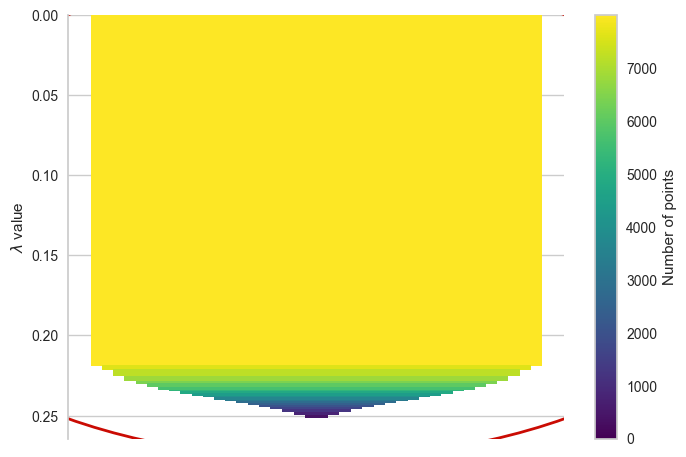

In [ ]:
clust_alg_leaf.condensed_tree_.plot(select_clusters=True)

In [ ]:
# Getting cluster assignments
cluster_assignments = clust_alg_leaf.labels_

# Assigning the clusters to each profile
df['Cluster Labels'] = cluster_assignments

vectorized_df['Cluster Labels'] = cluster_assignments

In [54]:
with open("refined_cluster.pkl",'wb') as fp:
    pickle.dump(df, fp)
    
with open("vectorized_refined.pkl", 'wb') as fp:
    pickle.dump(vectorized_df, fp)

In [55]:
# Importing 3 models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [56]:
# Assigning the split variables
X = vectorized_df.drop(["Cluster Labels"], axis=1)
y = vectorized_df['Cluster Labels']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
# Dummy
dummy = DummyClassifier(strategy='stratified')

# KNN
knn = KNeighborsClassifier()

# SVM
svm = SVC(gamma='scale')

# NaiveBayes
nb = ComplementNB()

# Logistic Regression
lr = LogisticRegression()

# Adaboost
adab = AdaBoostClassifier()

#Randomforest
rand_for = RandomForestClassifier()

#Extra trees
ext_tree = ExtraTreesClassifier()

# List of models
models = [dummy, knn, svm, nb, lr, adab, rand_for, ext_tree]

# List of model names
names = ['Dummy', 'KNN', 'SVM', 'NaiveBayes', 'Logistic Regression', 'Adaboost', 'RF', 'Extra Trees']

# Zipping the lists
classifiers = dict(zip(names, models))


<Axes: title={'center': 'Count of Class Distribution'}, ylabel='count'>

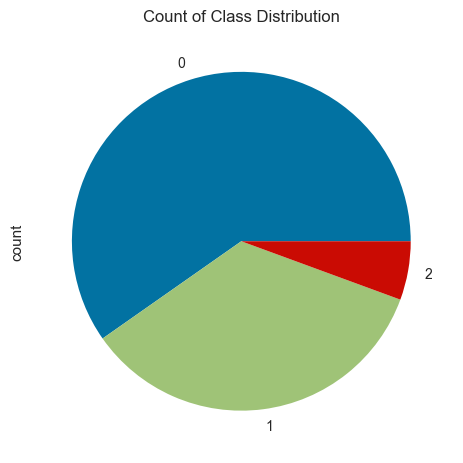

In [58]:
vectorized_df['Cluster Labels'].value_counts().plot(kind='pie', title='Count of Class Distribution')

In [59]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, model in tqdm(classifiers.items()):
    try:
        # Fitting the model
        model.fit(X_train, y_train)
        
        print('\n' + name + ' (Macro Avg - F1 Score):')
        
        # Check if X_test needs scaling and scale it if necessary
        if name == "KNN":
            X_test_scaled = scaler.transform(X_test)  # Assuming you've used StandardScaler
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)
        
        # Classification Report
        report = classification_report(y_test, y_pred, output_dict=True)
        f1 = report['macro avg']['f1-score']
        
        # Assigning to the Dictionary
        models_f1[name] = f1
        
        print(f1)
    except Exception as e:
        print(f"Error for model {name}: {str(e)}")


 38%|███▊      | 3/8 [00:00<00:00, 18.56it/s]


Dummy (Macro Avg - F1 Score):
0.3308933769401082

KNN (Macro Avg - F1 Score):
1.0

SVM (Macro Avg - F1 Score):
1.0

NaiveBayes (Macro Avg - F1 Score):
0.9788837514107839


 62%|██████▎   | 5/8 [00:00<00:00, 18.55it/s]


Logistic Regression (Macro Avg - F1 Score):
1.0

Adaboost (Macro Avg - F1 Score):
0.8139210489608034


 88%|████████▊ | 7/8 [00:00<00:00,  6.25it/s]


RF (Macro Avg - F1 Score):
1.0


100%|██████████| 8/8 [00:01<00:00,  7.02it/s]


Extra Trees (Macro Avg - F1 Score):
1.0


In [60]:
ext_tree.fit(X,y)

ExtraTreesClassifier()

In [61]:
from joblib import dump

dump(nb, "final_model.joblib")

['final_model.joblib']